## Script that open a file

Let assume we want to open a txt file name file.txt. The following code will be using

In [6]:
f = open("file.txt", "r")


## Find the shortest path
We are looking for the shortest part from a point A to a point B given their latitudinal and longitudinal coordinates. For achieving our goal, we first create a class Node that describes a given node of our work. We will the graph theory for this work.

As library, we will use networkx for drawing the graph and matplolib for displaying it


In [7]:
import math
from math import sin, cos, sqrt, atan2, radians

class Node(object):
    '''Creates a point with values latitude and longitude as coordinates.'''
    def __init__(self, latitude, longitude):
        '''Defines latitude and longitude variables'''
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        return "Node(%s,%s)"%(self.latitude, self.longitude)


    def getLatitude(self):
        return self.latitude

    def getLongitude(self):
        return self.longitude

    def distance(self, other, R= 6373.0):
        '''Compute the distance between two points given their coordinates.
        R is the approximation of the radius of the earth in km '''
        dlat = radians(self.latitude) - radians(other.latitude)
        dlon = radians(self.longitude) - radians(other.longitude)
        a = sin(dlat / 2)**2 + cos(self.latitude) * cos(other.latitude) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        return (distance)
# Test the node
def testNode(x=0,y=0):
    '''Returns a point and distance'''
    p1 = Node(3, 4)
    print (p1)
    p2 = Node(3,0)
    print (p2)
    return (p1.distance(p2))

print ("distance = %s"%(testPoint()))

NameError: name 'testPoint' is not defined

In [8]:
def shortestpath(start, end , weight, shortestRoute, visited, routesTable):
# Check if start and end nodes exists in route table
    if start in routesTable and end in routesTable:
        visited.append(start) # mark start to visited
        #print ('visited', visited)
        # For all not adjences of the started node
        for adj in routesTable[start]:
            if(adj == end or adj not in visited):
                weight += routesTable[start][adj]

            '''
        If destination matches, we compare
        weight of this route to shortest route
        so far, and make appropriate switch
            '''
            if adj == end:
                if shortestRoute == 0 or weight < shortestRoute:
                    shortestRoute = weight
                #print('remove : ', start)
                visited.remove(start)
                
                #print('visited', visited,'Shortest route', shortestRoute)
                return shortestRoute
            '''
        If destination does not match, and
        destination node has not yet been visited,
        we recursively traverse destination node
            '''
            if adj not in visited:
                shortestRoute = shortestpath(adj, end, weight, shortestRoute, visited, routesTable)
                weight -= routesTable[start][adj]
    else:
        return "No such route exists"


    return shortestRoute


## Try the above function

In [9]:
# Create differents points
na =Node(1,2) # Point A
nb=Node(1,3)  # Point B
nc = Node(2,5) #Point C
nd=Node(6,1)  # Point D
ne=Node(5,4) # Point E

# Create a graph 

graph = {'A': {'B':na.distance(nb) , 'D': na.distance(nd) },
         'B': {'C': nb.distance(nc)},'C': {'E': nc.distance(ne)},
         'D': {'C': nd.distance(nc), 'E':  nd.distance(ne)},'E': {'B': ne.distance(nb),
                                                                  'A':ne.distance(na)}}


### Print the shortest distance from A to A

In [10]:
print('The shortest path from A to A is : ',shortestpath('A', 'A', 0, 0, [], graph))

The shortest path from A to A is :  880.2535587203795


# Display a graph created above

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('A', 'B')], weight=round(na.distance(nb),2))
G.add_edges_from([('A','D')], weight=round(na.distance(nd),2))
G.add_edges_from([('B','C')], weight=round(nb.distance(nc),2))
G.add_edges_from([('C','E')], weight=round(nc.distance(ne),2))
G.add_edges_from([('D','C')], weight=round(nd.distance(nc),1))
G.add_edges_from([('D','E')], weight=round(nd.distance(ne),1))
G.add_edges_from([('E','A')], weight=round(ne.distance(na),1))


edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]



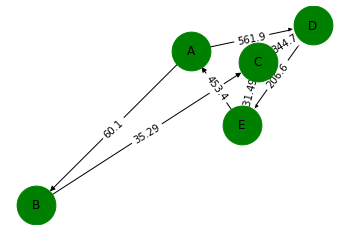

In [12]:
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = 'green', node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds, with_labels = True)
plt.show()


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
def test():
    # Create differents points
    na =Node(1,2) # Point A
    nb=Node(1,3)  # Point B
    nc = Node(2,5) #Point C
    nd=Node(6,1)  # Point D
    ne=Node(5,4) # Point E

    # Create a graph 

    graph = {'A': {'B':na.distance(nb) , 'D': na.distance(nd) },
         'B': {'C': nb.distance(nc)},'C': {'E': nc.distance(ne)},
         'D': {'C': nd.distance(nc), 'E':  nd.distance(ne)},'E': {'B': ne.distance(nb),
                                                                  'A':ne.distance(na)}}

    G = nx.DiGraph()
    G.add_edges_from([('A', 'B')], weight=round(na.distance(nb),2))
    G.add_edges_from([('A','D')], weight=round(na.distance(nd),2))
    G.add_edges_from([('B','C')], weight=round(nb.distance(nc),2))
    G.add_edges_from([('C','E')], weight=round(nc.distance(ne),2))
    G.add_edges_from([('D','C')], weight=round(nd.distance(nc),1))
    G.add_edges_from([('D','E')], weight=round(nd.distance(ne),1))
    G.add_edges_from([('E','A')], weight=round(ne.distance(na),1))


    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    red_edges = [('C','D'),('D','A')]
    edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

    pos=nx.spring_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G,pos, node_color = 'green', node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds, with_labels = True)
    plt.show()


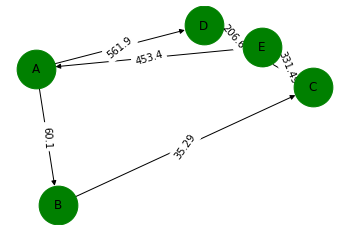

In [14]:
test()